<a href="https://colab.research.google.com/github/KendallScott/Machine-Learning/blob/main/Lab%202/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from google.colab import files

In [ ]:
files.upload()
# read the files into a dataframe
forest_cover_type = pd.read_csv('covtype.csv') 

# verify the dataframe loaded
print(forest_cover_type.shape)
forest_cover_type.head()

Saving covtype.csv to covtype (1).csv
(581012, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


# Data Preparation Part 1

In [ ]:
# Data clean-up
# make list of continuous variables
continuous_variables = ['Elevation', 
                        'Aspect', 
                        'Slope', 
                        'Horizontal_Distance_To_Hydrology', 
                        'Vertical_Distance_To_Hydrology',
                        'Horizontal_Distance_To_Roadways',
                        'Hillshade_9am','Hillshade_Noon',
                        'Hillshade_3pm',
                        'Horizontal_Distance_To_Fire_Points']

# use list to make df
continuous_variables_df = forest_cover_type[continuous_variables]

# subset df to make binary categorical
# second number not inclusive
Wilderness_Area = forest_cover_type.iloc[:, 10:14]
Wilderness_Area['Wilderness_Area'] = Wilderness_Area.idxmax(axis = 1)

# subset df to make binary categorical
# second number not inclusive
Soil_Type = forest_cover_type.iloc[:, 14:54]
Soil_Type['Soil_Type'] = Soil_Type.idxmax(axis = 1)

# only keep the new column
Soil_Type = Soil_Type[['Soil_Type']]
Wilderness_Area = Wilderness_Area[['Wilderness_Area']]

# Add new columns to df
forest_cover_type['Soil_Type'] = Soil_Type
forest_cover_type['Wilderness_Area'] = Wilderness_Area

# delete first few characters in column so we only have number
forest_cover_type['Soil_Type'] = forest_cover_type['Soil_Type'].str[9:]
forest_cover_type['Wilderness_Area'] = forest_cover_type['Wilderness_Area'].str[15:]


# delete superfluous columns now that new columns are added
forest_cover_type.drop(forest_cover_type.iloc[:, 10:54], 
                       axis = 1, 
                       inplace = True)



<ipython-input-5-19057e19dc31>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Wilderness_Area['Wilderness_Area'] = Wilderness_Area.idxmax(axis = 1)
<ipython-input-5-19057e19dc31>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Soil_Type['Soil_Type'] = Soil_Type.idxmax(axis = 1)


In [ ]:
# Convert to category data type
forest_cover_type['Cover_Type'] = forest_cover_type['Cover_Type'].astype('category')
forest_cover_type['Soil_Type'] = forest_cover_type['Soil_Type'].astype('category')
forest_cover_type['Wilderness_Area'] = forest_cover_type['Wilderness_Area'].astype('category')

In [ ]:
# Check the data types
forest_cover_type.dtypes

Elevation                                int64
Aspect                                   int64
Slope                                    int64
Horizontal_Distance_To_Hydrology         int64
Vertical_Distance_To_Hydrology           int64
Horizontal_Distance_To_Roadways          int64
Hillshade_9am                            int64
Hillshade_Noon                           int64
Hillshade_3pm                            int64
Horizontal_Distance_To_Fire_Points       int64
Cover_Type                            category
Soil_Type                             category
Wilderness_Area                       category
dtype: object

In [ ]:
forest_cover_type

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness_Area
0,2596,51,3,258,0,510,221,232,148,6279,5,29,1
1,2590,56,2,212,-6,390,220,235,151,6225,5,29,1
2,2804,139,9,268,65,3180,234,238,135,6121,2,12,1
3,2785,155,18,242,118,3090,238,238,122,6211,2,30,1
4,2595,45,2,153,-1,391,220,234,150,6172,5,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,3,2,3
581008,2391,152,19,67,12,95,240,237,119,845,3,2,3
581009,2386,159,17,60,7,90,236,241,130,854,3,2,3
581010,2384,170,15,60,5,90,230,245,143,864,3,2,3


## Data Meaning 

Attributes:	

- 10 quantitative variables
  - Elevation - Elevation in meters
  - Aspect - Aspect in degrees azimuth
  - Slope - Slope in degrees
  - Horizontal Distance to Hydrology - Horz Dist to nearest surface water features (meters)
  - Vertical Distance to Hydrology - Vert Dist to nearest surface water features (meters)
  - Horizontal Distance to Roadways - Horz Dist to nearest roadway (meters)
  - Hill shade 9 am (0 to 255 index) - Hillshade index at 9am, summer solstice
  - Hill shade noon (0 to 255 index) - Hillshade index at noon, summer solstice
  - Hill shade 3 pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
  - Horizontal distance to fire points - Horz Dist to nearest wildfire ignition points (meters)


- 3 Categorical variables
	- Wilderness area
  - 1: Neota
  - 2: Rawah
  - 3: Comanche Peak
  - 4: Cache la Poudre
	- Cover Type
  - 1: Spruce/Fir
  - 2: Lodgepole Pine
  - 3: Ponderosa Pine
  - 4: Cottonwood/Willow
  - 5: Aspen
  - 6: Douglas-fir
  - 7: Krummholz
	- Soil Type
		- 1: Cathedral family - Rock outcrop complex, extremely stony.
		- 2: Vanet - Ratake families complex, very stony.
		- 3: Haploborolis - Rock outcrop complex, rubbly.
		- 4: Ratake family - Rock outcrop complex, rubbly.
		- 5: Vanet family - Rock outcrop complex complex, rubbly.
		- 6: Vanet - Wetmore families - Rock outcrop complex, stony.
		- 7: Gothic family.
		- 8: Supervisor - Limber families complex.
		- 9: Troutville family, very stony.
		- 10: Bullwark - Catamount families - Rock outcrop complex, rubbly.
		- 11: Bullwark - Catamount families - Rock land complex, rubbly.
		- 12: Legault family - Rock land complex, stony.
		- 13: Catamount family - Rock land - Bullwark family complex, rubbly.
		- 14: Pachic Argiborolis - Aquolis complex.
		- 15: unspecified in the USFS Soil and ELU Survey.
		- 16: Cryaquolis - Cryoborolis complex.
		- 17: Gateview family - Cryaquolis complex.
		- 18: Rogert family, very stony.
		- 19: Typic Cryaquolis - Borohemists complex.
		- 20: Typic Cryaquepts - Typic Cryaquolls complex.
		- 21: Typic Cryaquolls - Leighcan family, till substratum complex.
		- 22: Leighcan family, till substratum, extremely bouldery.
		- 23: Leighcan family, till substratum - Typic Cryaquolls complex.
		- 24: Leighcan family, extremely stony.
		- 25: Leighcan family, warm, extremely stony.
		- 26: Granile - Catamount families complex, very stony.
		- 27: Leighcan family, warm - Rock outcrop complex, extremely stony.
		- 28: Leighcan family - Rock outcrop complex, extremely stony.
		- 29: Como - Legault families complex, extremely stony.
		- 30: Como family - Rock land - Legault family complex, extremely stony.
		- 31: Leighcan - Catamount families complex, extremely stony.
		- 32: Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
		- 33: Leighcan - Catamount families - Rock outcrop complex, extremely stony.
		- 34: Cryorthents - Rock land complex, extremely stony.
		- 35: Cryumbrepts - Rock outcrop - Cryaquepts complex.
		- 36: Bross family - Rock land - Cryumbrepts complex, extremely stony.
		- 37: Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
		- 38: Leighcan - Moran families - Cryaquolls complex, extremely stony.
		- 39: Moran family - Cryorthents - Leighcan family complex, extremely stony.
		- 40: Moran family - Cryorthents - Rock land complex, extremely stony.	
	

---
# Data Preparation Part 2

We brought our original data down from 55 columns down to 13. This will, not only make it easier to view and understand the data, but also allow the machine to run the models we will create. 

We converted the following features into categorical features: Wilderness Area, Cover Type, Soil Type. The Soil Type feature was initially was spread out in binary columns for each type (40 of them). Wilderness Area was also like this, but just with less columns. Once combined into one column, the binary features were converted into categorical. 

The remaining 10 features are integer data types. The measurements used for these 10 features have no decimal point, so no need to convert to float. They have remained as an integer.

Using multiple continuous variables will help us create regression models, whereas having a few categorical features will allow for classification models. 



---
# Modeling and Evaluation 1

We will look at a variety of different metrics. We will look at accuracy first. We do this to get a general undersanding of the data models. We will look at other evaluation metrics due to accuracy being a good metric when the distributions are equal. Accuracy can be misleading becasue of the class distribution.

We will also measure the precision and recall for the models. These metrics  are good evaluation tools due to them taking into account both true positives and false positives/negatives. This allows for them being good despite the imbalnaced data. These two metrics are good indeicators but should still be looked at with caution. 

We will also look at the F1 score becasue of the caution that we place in the aforementioned metrics. F1 score is useful in imbalanced datasets because it takes into account both true positives and false positives/negatives. F1 score provides a trade-off between precision and recall; it is the harmonic mean of precision and recall.  

---
# Modeling and Evaluation 2	


We wanted to look at various splitting methods to measure various metrics for each one. We will start with test/train split.

We will use test/train due to its simpliity and ease of implementation. However, we also have slight cause for concern for thsi exact reason. It is a quick model splitting method.

We also will take a look at Cross Validation. This provides a more reliable estimate for model performance by averaging across folds. This is computationally expensive for large datasets like the one we have.

Finally, we will take a look at stratified cross validation. This will probably be the best one for our particular dataset because it ensures that the class proportions are maintained in each fold. This is good for imbalanced datasets like our own. 

---
# Modeling and Evaluation 3

### Random Forest

#### Test/Train Split

In [ ]:
# Make target variable and data variable
y = forest_cover_type[['Cover_Type']]
X = forest_cover_type.loc[:, forest_cover_type.columns != 'Cover_Type']

In [ ]:
# Takes about 2 min

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

# Create a random forest model
rfc = RandomForestClassifier(n_estimators = 100)

# Train the model on the training data
rfc.fit(X_train, y_train)

# Predict on the testing data
y_pred = rfc.predict(X_test)

# Calculate the accuracy of model
rfc_accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', rfc_accuracy) # 0.9625482990972695


<ipython-input-10-b1776713df84>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


Accuracy: 0.9627548342125418


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.97      0.96      0.96     42557
           2       0.96      0.98      0.97     56500
           3       0.95      0.97      0.96      7121
           4       0.93      0.85      0.88       526
           5       0.94      0.82      0.87      1995
           6       0.94      0.92      0.93      3489
           7       0.98      0.96      0.97      4015

    accuracy                           0.96    116203
   macro avg       0.95      0.92      0.94    116203
weighted avg       0.96      0.96      0.96    116203



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


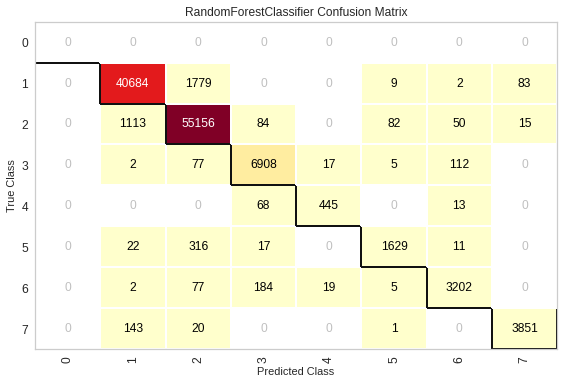

In [ ]:
# Adapted from https://www.scikit-yb.org/en/latest/api/classifier/confusion_matrix.html

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(rfc, classes=[0, 1, 2, 3, 4, 5, 6, 7])

# Fit the model. 
cm.fit(X_train, y_train)

# Score runs predict() on the data and creates the confusion_matrix
cm.score(X_test, y_test)

cm.show();

#### Cross Validation

In [ ]:
# takes about 25 min

# Create a random forest classifier
rfc = RandomForestClassifier(n_estimators = 100)

cv = KFold(n_splits = 10, 
           shuffle = True, 
           random_state = 42)

accuracies = []
precisions = []
recalls = []
f1_scores = []

for train_idx, test_idx in cv.split(X, y):

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    rfc.fit(X_train, y_train)

    # Predict 
    y_pred = rfc.predict(X_test)

    # Calculate the accuracy, precision, recall and F1-score
    rfc_accuracy = accuracy_score(y_test, y_pred)
    rfc_precision = precision_score(y_test, y_pred, average = 'weighted')
    rfc_recall = recall_score(y_test, y_pred, average = 'weighted')
    rfc_f1 = f1_score(y_test, y_pred, average = 'weighted')

    # add to the lists
    accuracies.append(rfc_accuracy)
    precisions.append(rfc_precision)
    recalls.append(rfc_recall)
    f1_scores.append(rfc_f1)

    print('Accuracy:', rfc_accuracy)
    print('Precision:', rfc_precision)
    print('Recall:', rfc_recall)
    print('F1-score:', rfc_f1)
    print('\n')

# Print the mean 
print('\n')
print('Accuracy:', sum(accuracies) / len(accuracies))
print('Precision:', sum(precisions) / len(precisions))
print('Recall:', sum(recalls) / len(recalls))
print('F1-score:', sum(f1_scores) / len(f1_scores))

<ipython-input-13-6d129f9ac4fd>:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


Accuracy: 0.9639943547554302
Precision: 0.9639732334761837
Recall: 0.9639943547554302
F1-score: 0.9638809942238071




<ipython-input-13-6d129f9ac4fd>:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


Accuracy: 0.9659564214656983
Precision: 0.9659361760728504
Recall: 0.9659564214656983
F1-score: 0.9657944548487938




<ipython-input-13-6d129f9ac4fd>:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


Accuracy: 0.9652329564035043
Precision: 0.9651962676284418
Recall: 0.9652329564035043
F1-score: 0.9651166200615023




<ipython-input-13-6d129f9ac4fd>:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


Accuracy: 0.9664377549439769
Precision: 0.9664239056248738
Recall: 0.9664377549439769
F1-score: 0.9663167001420364




<ipython-input-13-6d129f9ac4fd>:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


Accuracy: 0.964647768540989
Precision: 0.964643605520424
Recall: 0.964647768540989
F1-score: 0.9645392648286709




<ipython-input-13-6d129f9ac4fd>:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


Accuracy: 0.9661451610127192
Precision: 0.9661624775409697
Recall: 0.9661451610127192
F1-score: 0.9660033088675672




<ipython-input-13-6d129f9ac4fd>:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


Accuracy: 0.9647682483950363
Precision: 0.9647608122123835
Recall: 0.9647682483950363
F1-score: 0.9646610842214359




<ipython-input-13-6d129f9ac4fd>:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


Accuracy: 0.9660935267895561
Precision: 0.966107070808033
Recall: 0.9660935267895561
F1-score: 0.9659618972337751




<ipython-input-13-6d129f9ac4fd>:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


Accuracy: 0.9664549663516979
Precision: 0.9664644675437258
Recall: 0.9664549663516979
F1-score: 0.9663593502638367




<ipython-input-13-6d129f9ac4fd>:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


Accuracy: 0.9651813221803411
Precision: 0.96519901523444
Recall: 0.9651813221803411
F1-score: 0.9650530240199201




Accuracy: 0.9654912480838949
Precision: 0.9654867031662325
Recall: 0.9654912480838949
F1-score: 0.9653686698711346


**Cross Validation**

Mean Accuracy: 0.9656134497007921

Mean Precision: 0.9656145889819336

Mean Recall: 0.9656134497007921

Mean F1-score: 0.965490408727959

#### Stratified Cross Validation

In [18]:
# takes about 25 min

# Create a random forest classifier
rfc = RandomForestClassifier(n_estimators = 100)

# Create a stratified 10-fold cross-validation 
cv = StratifiedKFold(n_splits = 10, 
                     shuffle = True, 
                     random_state = 42)

accuracies = []
precisions = []
recalls = []
f1_scores = []

for train_idx, test_idx in cv.split(X, y):

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train the model
    rfc.fit(X_train, y_train)

    # Predict 
    y_pred = rfc.predict(X_test)

    # Calculate the accuracy, precision, recall and F1-score
    rfc_accuracy = accuracy_score(y_test, y_pred)
    rfc_precision = precision_score(y_test, y_pred, average = 'weighted')
    rfc_recall = recall_score(y_test, y_pred, average = 'weighted')
    rfc_f1 = f1_score(y_test, y_pred, average = 'weighted')

    # Append to the list
    accuracies.append(rfc_accuracy)
    precisions.append(rfc_precision)
    recalls.append(rfc_recall)
    f1_scores.append(rfc_f1)

# Print the scores
    print('Accuracy:', rfc_accuracy)
    print('Precision:', rfc_precision)
    print('Recall:', rfc_recall)
    print('F1-score:', rfc_f1)
    print('\n')

# Print the mean scores
print('\n')
print('Mean accuracy:', sum(accuracies) / len(accuracies))
print('Mean precision:', sum(precisions) / len(precisions))
print('Mean recall:', sum(recalls) / len(recalls))
print('Mean F1-score:', sum(f1_scores) / len(f1_scores))

<ipython-input-18-a6c75ab2cc8b>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


Accuracy: 0.9654056658979037
Precision: 0.9654464406354869
Recall: 0.9654056658979037
F1-score: 0.9652419520664685




<ipython-input-18-a6c75ab2cc8b>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


Accuracy: 0.9647344325496541
Precision: 0.9647064582562016
Recall: 0.9647344325496541
F1-score: 0.9646217222583824




<ipython-input-18-a6c75ab2cc8b>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


Accuracy: 0.965594395965646
Precision: 0.9656126861552606
Recall: 0.965594395965646
F1-score: 0.9654642017723344




<ipython-input-18-a6c75ab2cc8b>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


Accuracy: 0.9655255503347618
Precision: 0.9655015046404918
Recall: 0.9655255503347618
F1-score: 0.9654047680165917




<ipython-input-18-a6c75ab2cc8b>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


Accuracy: 0.9648887282490834
Precision: 0.9649008681232814
Recall: 0.9648887282490834
F1-score: 0.9647460116747386




<ipython-input-18-a6c75ab2cc8b>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


Accuracy: 0.9654567047038777
Precision: 0.9654682794750932
Recall: 0.9654567047038777
F1-score: 0.9653386323377859




<ipython-input-18-a6c75ab2cc8b>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


Accuracy: 0.964234694755684
Precision: 0.9642550941822714
Recall: 0.964234694755684
F1-score: 0.9641208447276998




<ipython-input-18-a6c75ab2cc8b>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


Accuracy: 0.9670917884373763
Precision: 0.96704557449344
Recall: 0.9670917884373763
F1-score: 0.9669957592228617




<ipython-input-18-a6c75ab2cc8b>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


Accuracy: 0.9672122682914236
Precision: 0.9671970868931659
Recall: 0.9672122682914236
F1-score: 0.9671129226548523




<ipython-input-18-a6c75ab2cc8b>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


Accuracy: 0.9661795838281613
Precision: 0.9661868677932848
Recall: 0.9661795838281613
F1-score: 0.9660493184462681




Mean accuracy: 0.9656323813013573
Mean precision: 0.9656320860647977
Mean recall: 0.9656323813013573
Mean F1-score: 0.9655096133177983


**Stratified Cross Validation**

Mean accuracy: 0.9655583699968281

Mean precision: 0.9655532905020234

Mean recall: 0.9655583699968281

Mean F1-score: 0.9654357962790965

### KNN

#### Test/Train Split

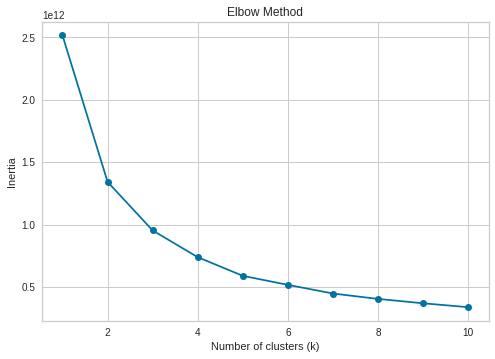

In [ ]:
# Takes 2.5 min

# Try different values of k to find the elbow point
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker = 'o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

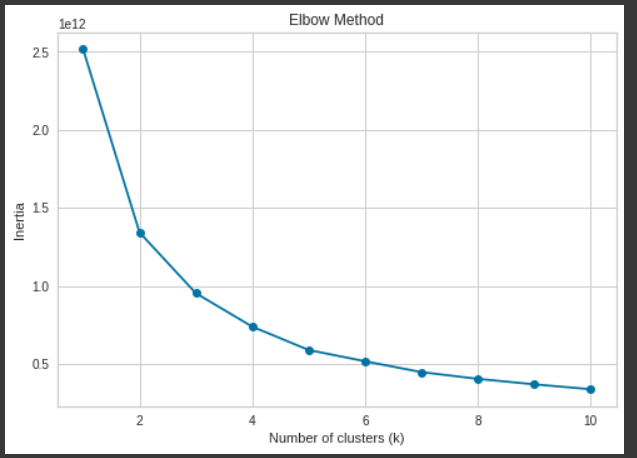

In [ ]:
# Create a KNN classifier with k = 6
knn = KNeighborsClassifier(n_neighbors = 6)

# Train the model
knn.fit(X_train, y_train)

# Predict 
y_pred = knn.predict(X_test)

# Calculate the metrics of the model
knn_accuracy = accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred, average = 'weighted')
knn_recall = recall_score(y_test, y_pred, average = 'weighted')
knn_f1 = f1_score(y_test, y_pred, average = 'weighted')

# Print metrucs
print('\n')
print('Accuracy:', knn_accuracy) 
print('Precision:', knn_precision)
print('Recall:', knn_recall)
print('F1-score:', knn_f1)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)




Accuracy: 0.9685547580936645
Precision: 0.9686905225021298
Recall: 0.9685547580936645
F1-score: 0.9684121945258358


Accuracy: 0.9685547580936645

Precision: 0.9686905225021298

Recall: 0.9685547580936645

F1-score: 0.9684121945258358

In [ ]:
# print the metrics for each individual class
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.96      0.98      0.97     21184
           2       0.98      0.97      0.97     28330
           3       0.96      0.97      0.97      3575
           4       0.93      0.79      0.85       275
           5       0.97      0.83      0.89       949
           6       0.95      0.92      0.93      1737
           7       0.99      0.95      0.97      2051

    accuracy                           0.97     58101
   macro avg       0.96      0.91      0.94     58101
weighted avg       0.97      0.97      0.97     58101



#### Cross Validation

In [ ]:
# Create a k-NN classifier
knn = KNeighborsClassifier(n_neighbors = 6)

# Evaluate the model using 10-fold cross validation
scores = cross_val_score(knn, 
                         X, 
                         y, 
                         cv = 10)


# Print the accuracy of each fold and the mean accuracy
print('\n')
print('Accuracy of each fold:', scores)
print('\n')
print('Mean accuracy:', scores.mean()) # Mean accuracy: 0.5362315601229429


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.p



Accuracy of each fold: [0.60906681 0.49218616 0.59344934 0.55694394 0.4901981  0.52844185
 0.53351922 0.50188465 0.4732965  0.58332903]


Mean accuracy: 0.5362315601229429


#### Stratified Cross Validation 

In [ ]:
# Use stratified 10 fold cross validation to evaluate the model
cv = StratifiedKFold(n_splits = 10)
scores = cross_val_score(knn, 
                         X, 
                         y, 
                         cv = cv)

# Print the accuracy of each fold and the mean accuracy
print('\n')
print('Accuracy of each fold:', scores)
print('\n')
print('Mean accuracy:', scores.mean()) # 0.5362315601229429

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.p



Accuracy of each fold: [0.60906681 0.49218616 0.59344934 0.55694394 0.4901981  0.52844185
 0.53351922 0.50188465 0.4732965  0.58332903]


Mean accuracy: 0.5362315601229429


### Logistic Regression

#### Test/Train Split

In [ ]:
# Create a logistic regression classifier
lr = LogisticRegression()

# Train the classifier on the training data
lr.fit(X_train, y_train)

# Predict the classes of the testing data
y_pred = lr.predict(X_test)

# Calculate the accuracy of the classifier
lr_accuracy = accuracy_score(y_test, y_pred)

print('\n')
print('Accuracy:', lr_accuracy) # 0.6206949966437755
print('\n')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




Accuracy: 0.6206949966437755




/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [ ]:
# print the metrics for each individual class
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.62      0.62      0.62     21184
           2       0.62      0.78      0.69     28330
           3       0.63      0.20      0.31      3575
           4       0.00      0.00      0.00       275
           5       0.00      0.00      0.00       949
           6       0.00      0.00      0.00      1737
           7       0.00      0.00      0.00      2051

    accuracy                           0.62     58101
   macro avg       0.27      0.23      0.23     58101
weighted avg       0.57      0.62      0.58     58101



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Cross Validation

In [ ]:
# Perform 10-fold cross-validation and calculate the mean accuracy
cv_scores = cross_val_score(lr, X, y, cv = 10)
mean_accuracy = cv_scores.mean()

print('\n')
print('Cross-validation accuracy:', mean_accuracy) # 0.6009685968081737
print('\n')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming



Cross-validation accuracy: 0.6009685968081737




/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


Cross-validation accuracy: 0.6009685968081737


#### Stratified Cross Validation

In [ ]:
# Create a stratified 10-fold cross-validator
skf = StratifiedKFold(n_splits = 10)

# Perform cross-validation
cv_scores = cross_val_score(lr, X, y, cv = skf)

# Calculate the mean accuracy of the cross-validation scores
mean_accuracy = cv_scores.mean()

print('\n')
print('Cross-validation accuracy:', mean_accuracy)
print('\n')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming



Cross-validation accuracy: 0.6009685968081737




/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


Cross-validation accuracy: 0.6009685968081737


### Regression Models for Elevation

Random Forest

In [ ]:
# Make target variable and data variable
y = forest_cover_type[['Elevation']]
X = forest_cover_type.loc[:, forest_cover_type.columns != 'Elevation']

In [ ]:
# Feature Importance Graph
# Takes about five minutes
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 50)
rf.fit(X, y)

<ipython-input-26-fbdec8dd1324>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X, y)


RandomForestRegressor(n_estimators=50)

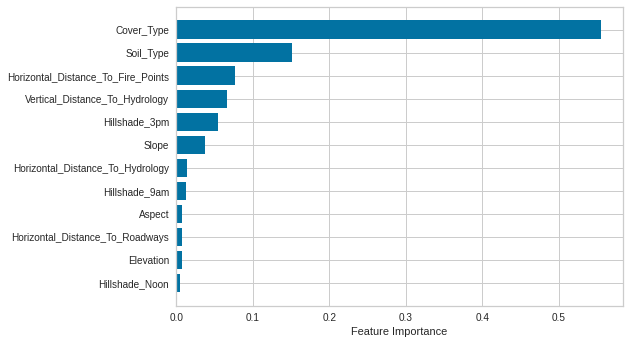

In [ ]:
sort = rf.feature_importances_.argsort()
plt.barh(forest_cover_type.columns.values[sort], rf.feature_importances_[sort])
plt.xlabel('Feature Importance')
plt.show()

In [ ]:
# Use stratified 10 fold cross validation to evaluate the model
cv = StratifiedKFold(n_splits = 10)
scores = cross_val_score(rf, 
                         X, 
                         y, 
                         cv = cv)

# Print the accuracy of each fold and the mean accuracy
print('\n')
print('Accuracy of each fold:', scores)
print('\n')
print('Mean accuracy:', scores.mean()) # 0.5362315601229429

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy of each fold: [0.96559649 0.97192145 0.96660593 0.96420535 0.96813192 0.97361038
 0.97233023 0.96850529 0.9517026  0.89584921]


Mean accuracy: 0.9598458838616203


---
# Modeling and Evaluation 4

Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.


In [ ]:
print ('accuracy for KNN classifier is :',knn_accuracy)
print ('accuracy for Random Forest classifier is :',rfc_accuracy)
print ('accuracy for Logistic Regression classifier is :',lr_accuracy)

accuracy for KNN classifier is : 0.9685547580936645
accuracy for Random Forest classifier is : 0.9658525670814616
accuracy for Logistic Regression classifier is : 0.6206949966437755


In [ ]:
print ("AUC and ROC Curves comparison of models - Cover Type")
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import metrics as mt


plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(max_depth=5, n_estimators=10),
},
{
    'label': 'KNN Classifier',
    'model': KNeighborsClassifier(n_neighbors=6, weights='uniform', metric='euclidean'),
},
{
    'label': 'Logistic Regression Classifier',
    'model': LogisticRegression(),
},
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic for Forest Cover Type')
plt.legend(loc="lower right")
plt.show()   # Actual plot


AUC and ROC Curves comparison of models - Unemployment


<ipython-input-39-7deeb65161dc>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train) # train the model


ValueError: ignored

<Figure size 576x396 with 0 Axes>

The summary of the 3 tested models for forest cover type: 

*insert a table to compare each model with accuracy, precision, recall, and AUC.*

When comparing the three models to predict the forest cover type, the accuracy of KNN model is slightly better than the accuracy of Random Forest model with 96.9%. 

In [ ]:
# from sklearn import metrics as mt

# print ("Confusion matrix for Random Forest Model - Cover Type:")
# cm = mt.confusion_matrix(y_test, rfc_accuracy)

# # cm = mt.confusion_matrix(y_test, y_pred)
# # plt.imshow(cm,cmap=plt.get_cmap('Reds'),aspect='auto')
# # plt.grid(False)



from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import classification_report

# Load the classification data set
X, y = forest_cover_type()

# Specify the target classes
classes = ["Cover_Type", "Elevation"]

# Create the training and test data
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Instantiate the visualizer
visualizer = classification_report(
    GaussianNB(), X_train, y_train, X_test, y_test, classes=classes, support=True
)

Confusion matrix for Random Forest Model - Child Poverty:


TypeError: ignored

**NEED THIS TO BE LOOK AT ^**

--- 
# Modeling and Evaluation 5

Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.


**Accuracy Scores for various splitting methods vs models**

Splitting Method   | Random Forest | KNN    | Logistic
-------------------|---------------|--------|---------
Test/Train         | 0.9625        | 0.9658 | 0.6242
Cross Validation   | 0.9656        | 0.5362 | 0.6009
Stratified CV      | 0.9655        | 0.5362 | 0.6009


maybe include a table for other metrics

We looked at Train/Test Split to begin wih because it the most simplified and well-known form of data separation. We saw accuracy scores around 96% for Random Forest and kNN, but for Logistic Regression it dipped down to 62%. However, we have cause for concern with this method of splitting the data due to two of the Cover Types being highly skewed. Because of this, we looked at other data separation techniques. 

We use Stratified 10 Fold Cross Validation to help with the imbalanced dataset. This implements a fold in the data where each fold has the same ratio of instances of target variable as in the whole dataset. However, we saw a huge time increase in running this model. So something we have to consider is if the additional time is worth it? 

For our specific dataset, we saw about the same accuracy score. We had to look at some other performance metrics to gain a better understanding if the additional time is worth it. 

**NEED THIS TO BE LOOK AT ^**

---
# Modeling and Evaluation 6

Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.


**NEED THIS TO BE LOOK AT ^**

---
# Deployment
How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.? 


**NEED THIS TO BE LOOK AT ^**

---
# Exceptinal Work
You have free reign to provide additional analyses. One idea: grid search parameters in a parallelized fashion and visualize the performances across attributes. Which parameters are most significant for making a good model for each classification algorithm?


**NEED THIS TO BE LOOK AT ^**

### SVM

takes too long

In [ ]:
from sklearn.svm import SVC

# Create an SVM classifier
svm = SVC(kernel='linear')

# Train the classifier on the training data
svm.fit(X_train, y_train)

# Predict the classes of the testing data
y_pred = svm.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV

# Create an SVM classifier
svm = LinearSVC()

# Define the hyperparameters to search over
parameters = {'C': [0.1, 1, 10, 100]}

# Create a grid search object to search over the hyperparameters
grid_search = GridSearchCV(svm, parameters, cv=5)

# Fit the grid search object on the training data
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
svm = grid_search.best_estimator_

# Predict the classes of the testing data
y_pred = svm.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y

### Testing out a pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


# Define the classifiers
svm = SVC(kernel='linear', C=1)
logistic = LogisticRegression(solver='liblinear')
rfc = RandomForestClassifier(n_estimators=100)

# Define the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', 'passthrough')
])

# Set up the hyperparameters to be tuned for each model
svm_params = {'classifier': [svm]}
logistic_params = {'classifier': [logistic]}
rfc_params = {'classifier': [rfc]}

# Add the parameter dictionaries to a list
params = [svm_params, logistic_params, rfc_params]


# Train the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict the classes of the testing data using the pipeline
y_pred = pipe.predict(X_test)

# Calculate the accuracy of the pipeline
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

AttributeError: ignored

When the classes are imbalanced, the area under the Receiver Operating Characteristic (ROC) curve (AUC) is a useful evaluation metric. The ROC curve plots the true positive rate (sensitivity) against the false positive rate (1-specificity) at various thresholds. The AUC represents the probability that a randomly selected positive example will be ranked higher than a randomly selected negative example.